<a href="https://colab.research.google.com/github/pedrohortencio/covid-brasil/blob/main/Plot_SUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import urllib.request

url_script = 'https://raw.githubusercontent.com/pedrohortencio/covid-brasil/main/tratamento_dados_sus.py'
_, _ = urllib.request.urlretrieve(url_script, filename="/content/tratamento_dados_sus.py")
import tratamento_dados_sus as script_sus

sns.set_theme()

In [2]:
df_2019 = script_sus.criar_df_anual(2019)
df_2020 = script_sus.criar_df_anual(2020)

In [3]:
df_2020.head()

Lista Morb  CID-10  ...  Taxa_mortalidade
01 Algumas Doenças Infecciosas E Parasitárias 0                 Total do Grupo  ...             16.99
                                              1                         Cólera  ...              3.95
                                              2   Febres tifóide e paratifóide  ...              2.11
                                              3                     Shiguelose  ...               0.0
                                              4                       Amebíase  ...              2.11

[5 rows x 12 columns]

In [4]:
df_2019.head()

Lista Morb  CID-10  ...  Taxa_mortalidade
01 Algumas Doenças Infecciosas E Parasitárias 0                 Total do Grupo  ...              12.3
                                              1                         Cólera  ...              3.96
                                              2   Febres tifóide e paratifóide  ...              1.39
                                              3                     Shiguelose  ...               0.0
                                              4                       Amebíase  ...              2.83

[5 rows x 12 columns]

# Subplots (Internações - 20 Grupos CID)

In [5]:
grupos_cid = list(df_2020.index.get_level_values(0).unique()[:-1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


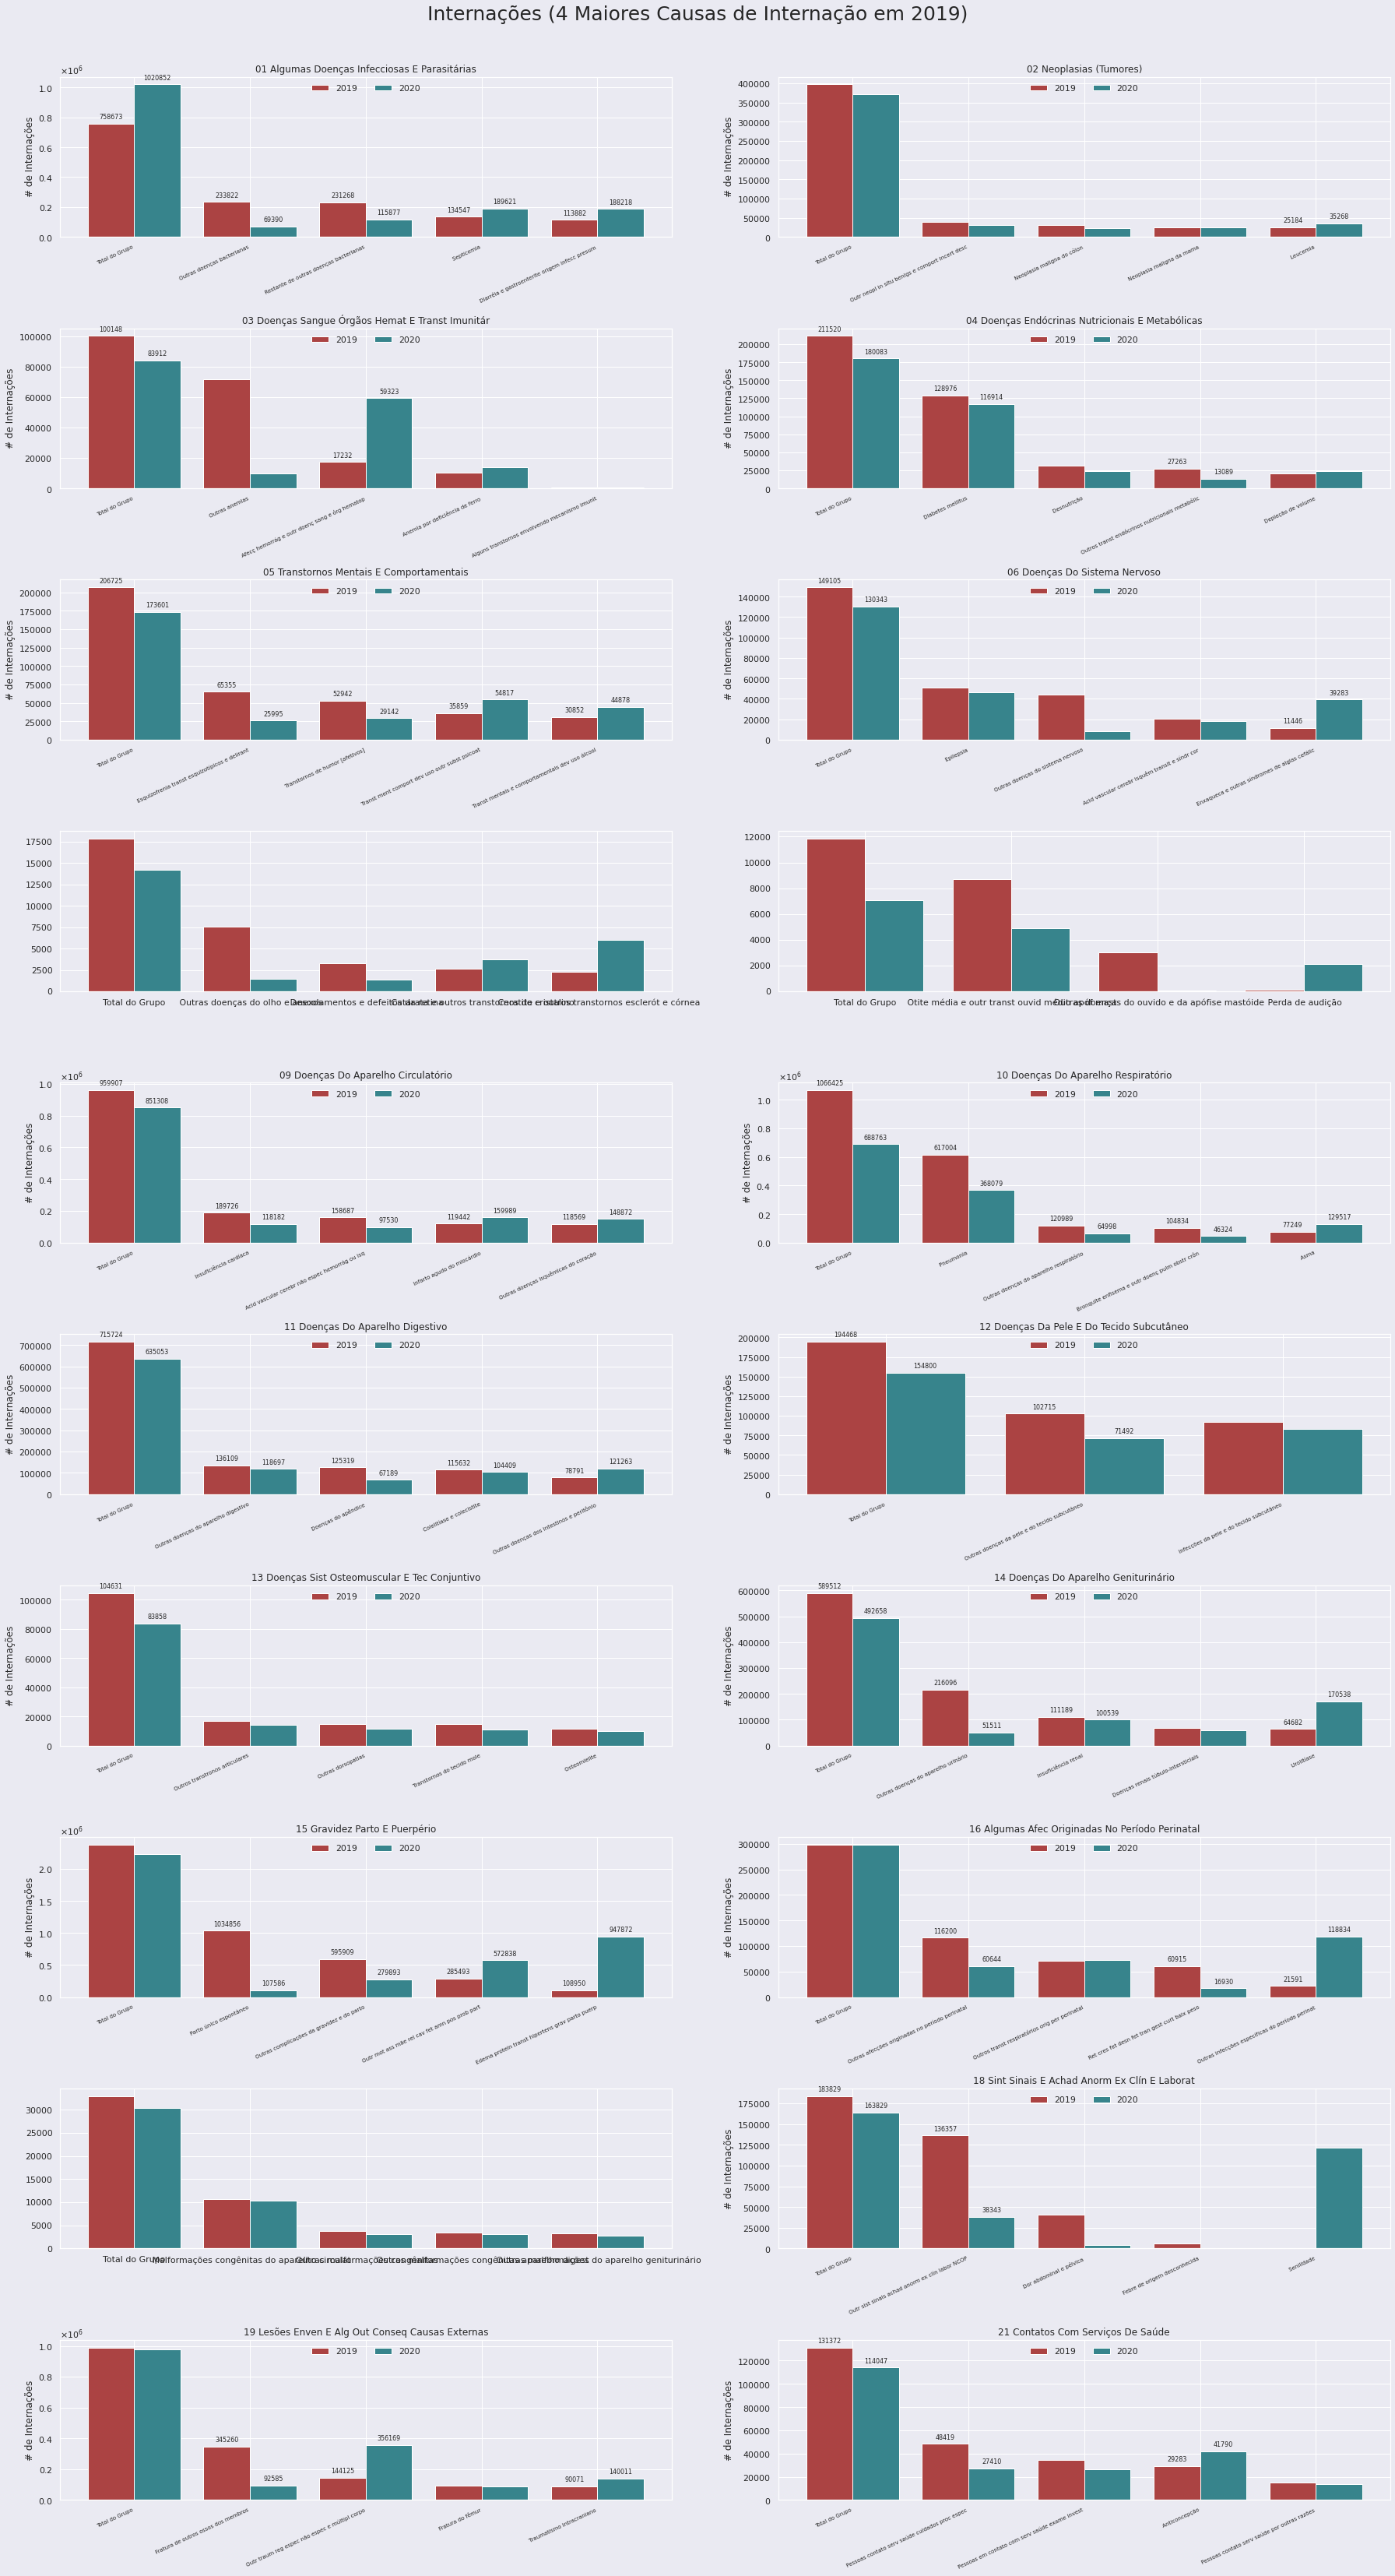

In [15]:
fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(25,45))
fig.patch.set_facecolor('#eaeaf2')  # set the background color of the plot to match the seaborn theme

width = 0.4
index = 0

for row in ax:
    for ax in row:
        rects1 = ax.bar(df_2019.loc[grupos_cid[index]].nlargest(5, columns=['Internações'])['Lista Morb  CID-10'].values, 
                        df_2019.loc[grupos_cid[index]].nlargest(5, columns=['Internações'])['Internações'].values, 
                        -width,align='edge', color = '#ab4343', label='2019')
        rects2 = ax.bar(df_2019.loc[grupos_cid[index]].nlargest(5, columns=['Internações'])['Lista Morb  CID-10'].values, 
                        df_2020.loc[grupos_cid[index]][df_2020.loc[grupos_cid[index]]["Lista Morb  CID-10"].isin(df_2019.loc[grupos_cid[index]].nlargest(5, columns=['Internações'])['Lista Morb  CID-10'].values)]['Internações'].values, 
                        width, align='edge', color = '#37848C', label='2020')

        for r1, r2 in zip(rects1.patches, rects2.patches):
            h1 = r1.get_height()
            h2 = r2.get_height()

            percent1 = h1
            percent2 = h2

            if h1/h2 > .90:
                if h1/h2 > 1.10:
                    pass
                else:
                    continue
            if h1 < 10000 or h2 < 10000:
                continue
            elif abs(h1 - h2) < 10000:
                continue 

            ax.annotate('{:.0f}'.format(percent1),
                            xy=(r1.get_x() + r1.get_width() / 2, h1),
                            xytext=(0, 4),  # 3 points vertical offset
                            textcoords="offset points",
                            rotation=0,
                            fontsize = 8,
                            ha='center', va='bottom')
            ax.annotate('{:.0f}'.format(percent2),
                            xy=(r2.get_x() + r2.get_width() / 2, h2),
                            xytext=(0, 4),  # 3 points vertical offset
                            textcoords="offset points",
                            rotation=0,
                            fontsize = 8,
                            ha='center', va='bottom')
            #plt.box(False)  # disable the box around the plot
            #ax.grid(False)  # disable the grid
            #ax.set_yticks([])   # disable the y ticks
            ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
            ax.set_ylabel('# de Internações')
            #ax.set_xlabel('Grupo CID')
            ax.tick_params(axis='x', which='major', labelsize=7, labelrotation=25)
            
            for tick in ax.xaxis.get_majorticklabels():
                tick.set_horizontalalignment("right")
            
            ax.title.set_text(grupos_cid[index])
            ax.legend(frameon=False, loc='upper center', ncol=2)
        index+=1

#plt.legend(frameon=False, loc='upper center', ncol=2)
plt.tight_layout()
#plt.rcParams['figure.constrained_layout.use'] = True
fig.suptitle("Internações (4 Maiores Causas de Internação em 2019)", fontsize=25, y=1.02)
plt.savefig("internacoes(2019-4-maiores-causas).png", bbox_inches='tight', dpi=100)

plt.show();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


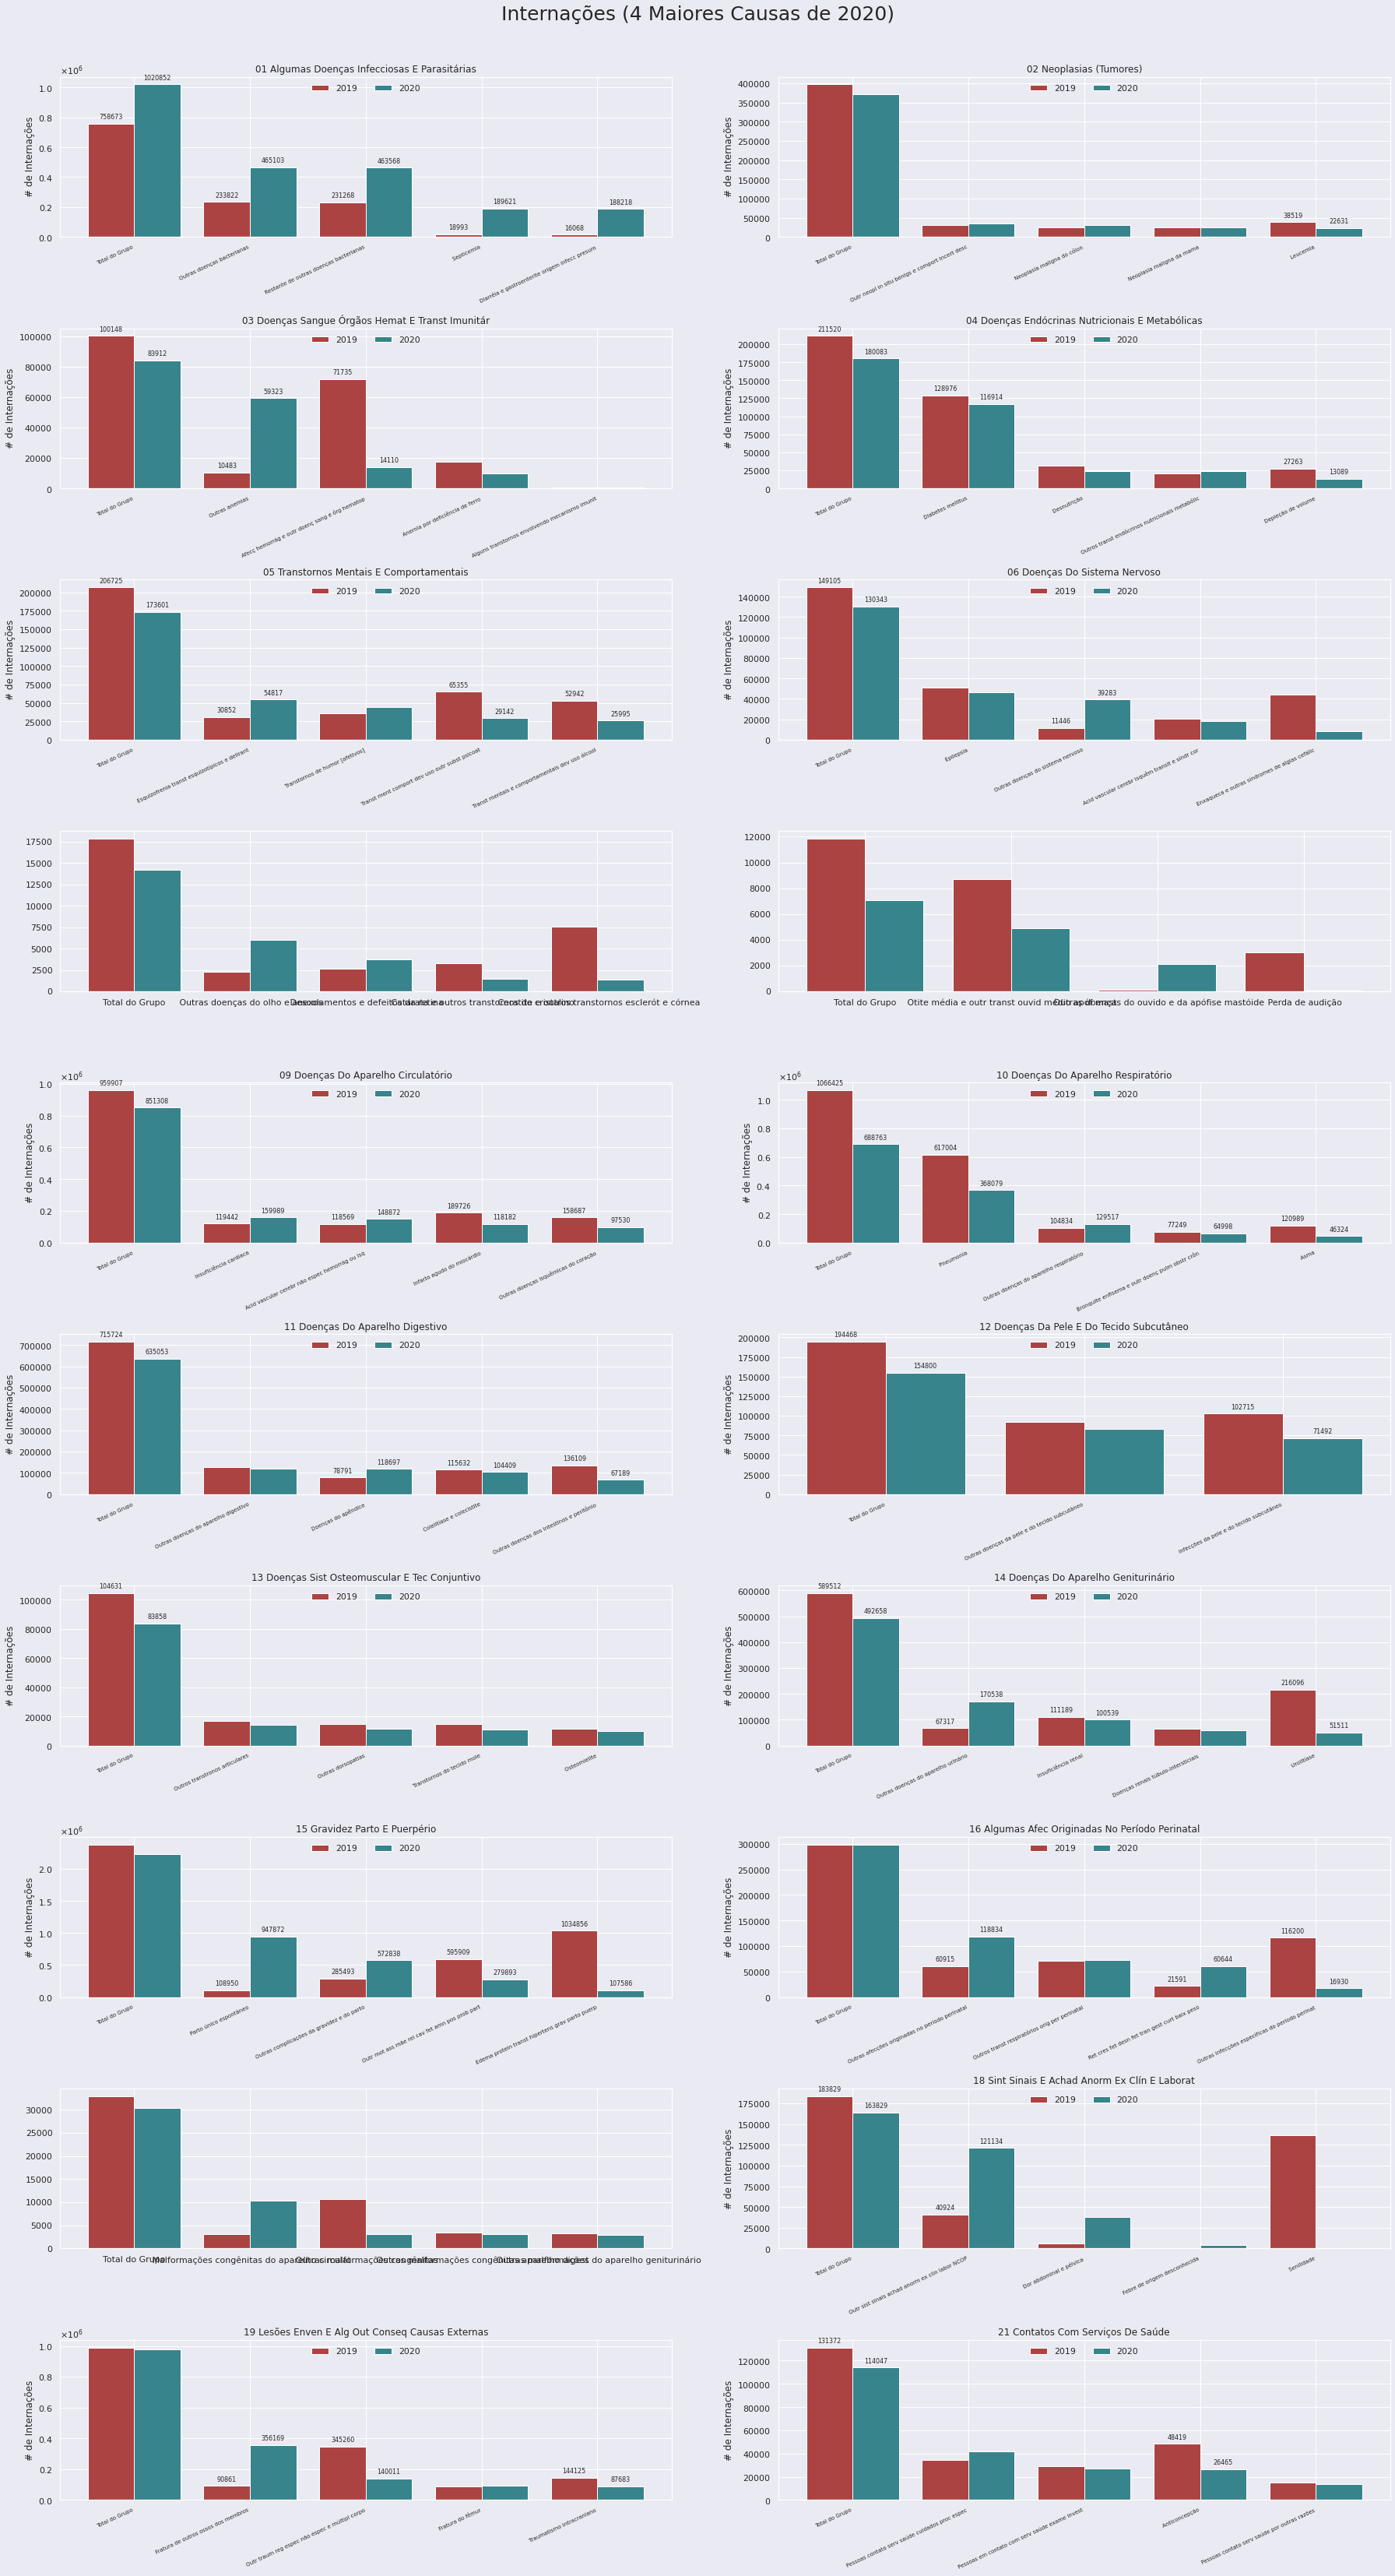

In [17]:
fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(25,45))
fig.patch.set_facecolor('#eaeaf2')  # set the background color of the plot to match the seaborn theme

width = 0.4
index = 0

for row in ax:
    for ax in row:
        rects1 = ax.bar(df_2019.loc[grupos_cid[index]].nlargest(5, columns=['Internações'])['Lista Morb  CID-10'].values, 
                        df_2019.loc[grupos_cid[index]][df_2019.loc[grupos_cid[index]]["Lista Morb  CID-10"].isin(df_2020.loc[grupos_cid[index]].nlargest(5, columns=['Internações'])['Lista Morb  CID-10'].values)]['Internações'].values, 
                        -width,align='edge', color = '#ab4343', label='2019')
        rects2 = ax.bar(df_2019.loc[grupos_cid[index]].nlargest(5, columns=['Internações'])['Lista Morb  CID-10'].values, 
                        df_2020.loc[grupos_cid[index]].nlargest(5, columns=['Internações'])['Internações'].values, 
                        width, align='edge', color = '#37848C', label='2020')

        for r1, r2 in zip(rects1.patches, rects2.patches):
            h1 = r1.get_height()
            h2 = r2.get_height()

            percent1 = h1
            percent2 = h2

            if h1/h2 > .90:
                if h1/h2 > 1.10:
                    pass
                else:
                    continue
            if h1 < 10000 or h2 < 10000:
                continue
            elif abs(h1 - h2) < 10000:
                continue 

            ax.annotate('{:.0f}'.format(percent1),
                            xy=(r1.get_x() + r1.get_width() / 2, h1),
                            xytext=(0, 4),  # 3 points vertical offset
                            textcoords="offset points",
                            rotation=0,
                            fontsize = 8,
                            ha='center', va='bottom')
            ax.annotate('{:.0f}'.format(percent2),
                            xy=(r2.get_x() + r2.get_width() / 2, h2),
                            xytext=(0, 4),  # 3 points vertical offset
                            textcoords="offset points",
                            rotation=0,
                            fontsize = 8,
                            ha='center', va='bottom')
            #plt.box(False)  # disable the box around the plot
            #ax.grid(False)  # disable the grid
            #ax.set_yticks([])   # disable the y ticks
            ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
            ax.set_ylabel('# de Internações')
            #ax.set_xlabel('Grupo CID')
            ax.tick_params(axis='x', which='major', labelsize=7, labelrotation=25)
            
            for tick in ax.xaxis.get_majorticklabels():
                tick.set_horizontalalignment("right")
            
            ax.title.set_text(grupos_cid[index])
            ax.legend(frameon=False, loc='upper center', ncol=2)
        index+=1

#plt.legend(frameon=False, loc='upper center', ncol=2)
plt.tight_layout()
plt.rcParams['figure.constrained_layout.use'] = True
fig.suptitle("Internações (4 Maiores Causas de 2020)", fontsize=25, y=1.02)
plt.savefig("internacoes(2020-4-maiores-causas).png.png", bbox_inches='tight', dpi=100)

plt.show();

# Versão GIF

In [8]:
valores_totais_2019 = df_2019[df_2019.loc[:]['Lista Morb  CID-10']=='Total do Grupo']['Internações'].values
valores_totais_2020 = df_2020[df_2020.loc[:]['Lista Morb  CID-10']=='Total do Grupo']['Internações'].values

if df_2020.index.get_level_values(0).unique()[:-1].all() == df_2019.index.get_level_values(0).unique()[:-1].all():
    lista_index = list(df_2020.index.get_level_values(0).unique()[:-1])
else:
    raise Exception("Os índices dos DataFrames são diferentes")

for i, grupo in enumerate(lista_index):
    try:
        if "Doenças Do" in grupo:
            lista_index[i] = grupo.replace("Doenças Do ", "")
        elif "Doenças" in grupo:
            lista_index[i] = grupo.replace("Doenças ", "")
        elif "Algumas" in grupo:
            lista_index[i] = grupo.replace("Algumas ", "")
        lista_index[i] = lista_index[i][:25]
    except:
        continue

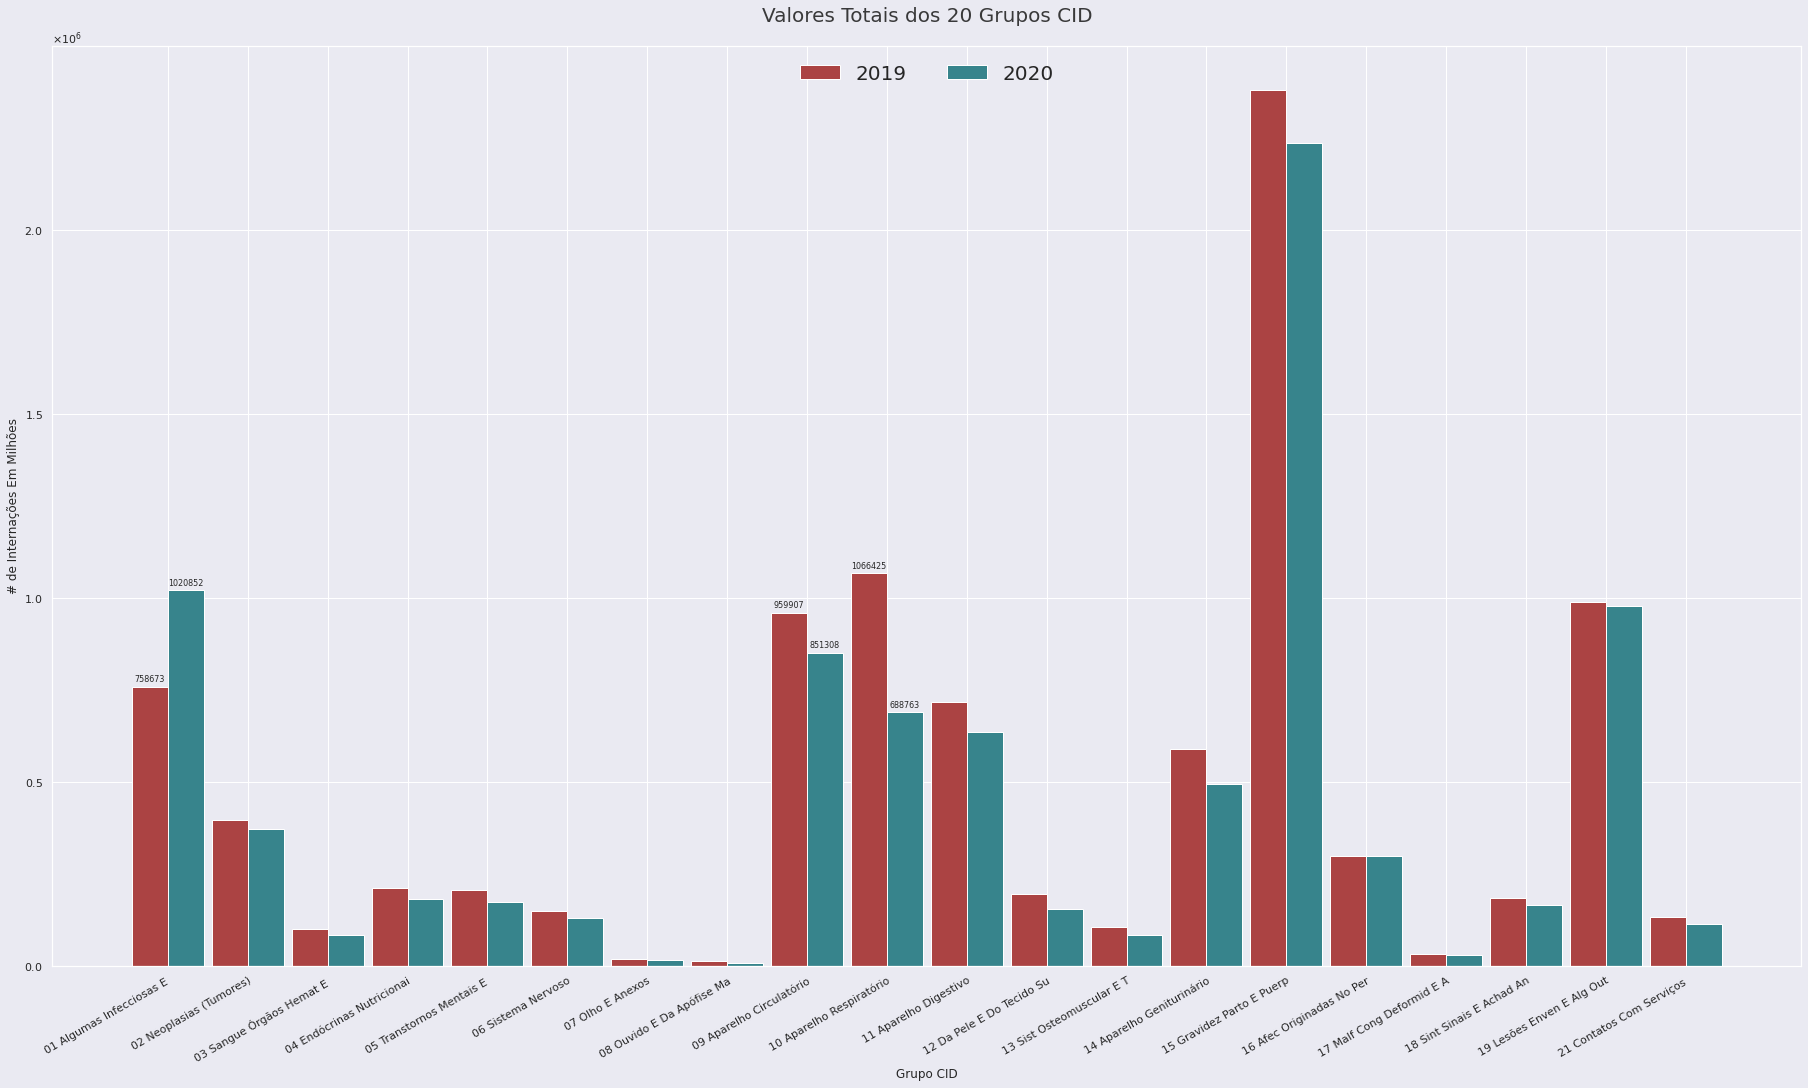

In [18]:
fig = plt.figure(figsize=(25,15))   # changes the size of the image
fig.patch.set_facecolor('#eaeaf2')  # set the background color of the plot to match the seaborn theme

ax = plt.gca()
width = 0.45

rects1 = ax.bar(lista_index, valores_totais_2019, -width,align='edge', color = '#ab4343', label='2019')
rects2 = ax.bar(lista_index, valores_totais_2020, width, align='edge', color = '#37848C', label='2020')


for r1, r2 in zip(rects1.patches, rects2.patches):
    h1 = r1.get_height()
    h2 = r2.get_height()


    if h1/h2 > .90:
        if h1/h2 > 1.10:
            pass
        else:
            continue
    if h1 < 100000 or h2 < 100000:
        continue
    elif abs(h1 - h2) < 100000:
        continue 

    ax.annotate('{:.0f}'.format(h1),
                    xy=(r1.get_x() + r1.get_width() / 2, h1),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize = 8,
                    ha='center', va='bottom')
    ax.annotate('{:.0f}'.format(h2),
                    xy=(r2.get_x() + r2.get_width() / 2, h2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize = 8,
                    ha='center', va='bottom')

# Rotate the X labels (models' names)

#plt.box(False)  # disable the box around the plot
#ax.grid(False)  # disable the grid
#ax.set_yticks([])   # disable the y ticks
plt.xticks(rotation=30, rotation_mode="anchor", ha='right')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.set_ylabel('# de Internações Em Milhões')
ax.set_xlabel('Grupo CID')
# creating a title
plt.title('Valores Totais dos 20 Grupos CID',
          size=20, alpha=0.9, y=1.02)

# add the legend (to display the horizontal lines' labels)
plt.legend(frameon=False, loc='upper center', ncol=2, prop={'size': 20})
plt.savefig("comparacaoTotalGruposCID.png", bbox_inches='tight', dpi=100)

# displays the plot
plt.show();